# CODSOFT TASK 5

## CREDIT CARD FRAUD DETECTION

Build a machine learning model to identify fraudulent credit card
transactions.

Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.

Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.

Evaluate the model's performance using metrics like precision, recall,
and F1-score, and consider techniques like oversampling or
undersampling for improving results.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score


import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Flatten, Dense, Dropout, BatchNormalization

In [ ]:
data = pd.read_csv('creditcard.csv')
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

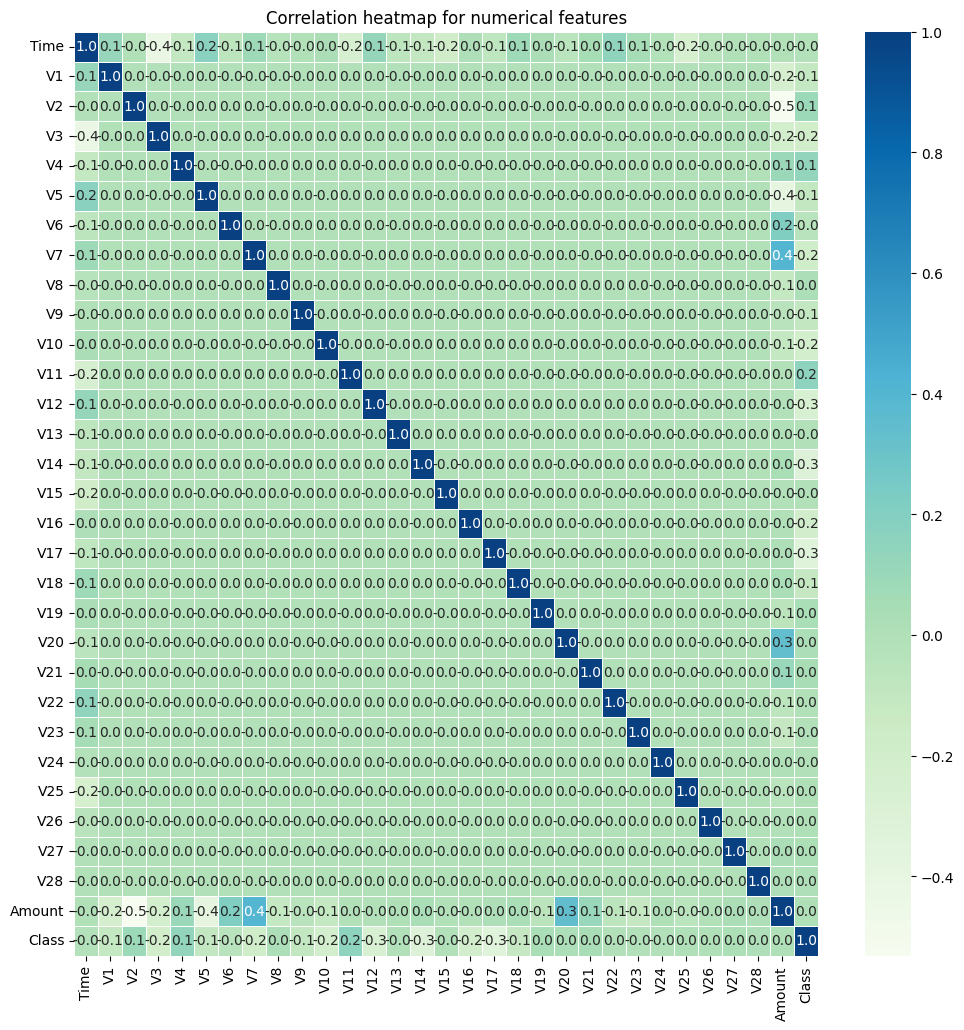

In [ ]:
# Correlation heat map for features
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data.select_dtypes(include=['int64', 'float64']).corr(), annot=True , cmap='GnBu' , fmt='.1f' , linewidth=.6)
plt.title('Correlation heatmap for numerical features')
plt.show()

In [ ]:
# distribution of legit transactions & fraudulent transactions
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
data['Class'] = pd.to_numeric(data['Class'], errors='coerce')

In [ ]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
# separating the data for analysis
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
legit_sample =  legit.sample(n=800)  # about 800 sample from legit
new_data = pd.concat([legit_sample, fraud] , axis=0)
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
241395,151009.0,-2.047764,0.312245,0.244463,-0.728611,-0.444579,-0.319033,-0.469899,1.140512,0.117151,...,0.234059,0.372939,-0.265980,-0.441612,-0.149413,0.646732,0.204029,-0.012603,56.00,0
1704,1317.0,-0.391757,0.591094,2.752836,0.726359,0.359031,0.781081,0.994960,-0.862935,0.765892,...,-0.239918,0.195502,-0.463516,-0.410537,0.354929,-0.373488,-0.963554,-0.894061,36.19,0
192958,129930.0,-0.566180,0.713219,0.433004,-0.771469,1.378519,0.912877,0.639031,0.314174,-0.475619,...,0.461097,1.444179,-0.406242,-1.307465,-0.036963,0.051417,0.050830,0.102338,1.00,0
6375,7585.0,1.066619,0.045169,0.789190,1.321876,-0.438488,0.071117,-0.456021,0.212419,1.487933,...,-0.156199,-0.368363,0.061203,-0.119568,0.200094,-0.501119,-0.000579,0.012387,36.00,0
33993,37465.0,-0.979249,0.900630,1.610020,-0.327893,1.446248,1.112611,1.073711,-0.030040,-0.087451,...,0.115803,0.825600,-0.244925,-0.965417,-0.008480,-0.419610,-0.211978,-0.266140,7.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
# Checking new balancing data
new_data['Class'].value_counts()

Class
0    800
1    492
Name: count, dtype: int64

In [ ]:
# Splitting the data into Features & Targets
X = new_data.drop(columns='Class', axis=1)
Y = new_data['Class']

In [ ]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
241395,151009.0,-2.047764,0.312245,0.244463,-0.728611,-0.444579,-0.319033,-0.469899,1.140512,0.117151,...,0.049966,0.234059,0.372939,-0.265980,-0.441612,-0.149413,0.646732,0.204029,-0.012603,56.00
1704,1317.0,-0.391757,0.591094,2.752836,0.726359,0.359031,0.781081,0.994960,-0.862935,0.765892,...,0.340517,-0.239918,0.195502,-0.463516,-0.410537,0.354929,-0.373488,-0.963554,-0.894061,36.19
192958,129930.0,-0.566180,0.713219,0.433004,-0.771469,1.378519,0.912877,0.639031,0.314174,-0.475619,...,-0.225392,0.461097,1.444179,-0.406242,-1.307465,-0.036963,0.051417,0.050830,0.102338,1.00
6375,7585.0,1.066619,0.045169,0.789190,1.321876,-0.438488,0.071117,-0.456021,0.212419,1.487933,...,-0.276879,-0.156199,-0.368363,0.061203,-0.119568,0.200094,-0.501119,-0.000579,0.012387,36.00
33993,37465.0,-0.979249,0.900630,1.610020,-0.327893,1.446248,1.112611,1.073711,-0.030040,-0.087451,...,-0.035720,0.115803,0.825600,-0.244925,-0.965417,-0.008480,-0.419610,-0.211978,-0.266140,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [ ]:
Y

241395    0
1704      0
192958    0
6375      0
33993     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 1292, dtype: int64

In [ ]:
# Split the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(1292, 30) (1033, 30) (259, 30)


In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# training data accuracy
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9564375605033882


In [ ]:
# test data accuracy
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9498069498069498


In [ ]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

y_train = Y_train.to_numpy()
y_test = Y_test.to_numpy()

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape = X_train[0].shape))# X_train[0].shape --> (30,1)
model.add(Dropout(0.2))
model.add(Conv1D(32, 2, activation='relu'))
model.add(Conv1D(16, 2, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 64)            192       
                                                                 
 dropout (Dropout)           (None, 29, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 32)            4128      
                                                                 
 conv1d_2 (Conv1D)           (None, 27, 16)            1040      
                                                                 
 dropout_1 (Dropout)         (None, 27, 16)            0         
                                                                 
 flatten (Flatten)           (None, 432)               0         
                                                                 
 dense (Dense)               (None, 32)                1

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/30
33/33 [==============================] - 8s 36ms/step - loss: 0.5984 - accuracy: 0.7551 - val_loss: 0.2749 - val_accuracy: 0.9305
Epoch 2/30
33/33 [==============================] - 1s 19ms/step - loss: 0.2922 - accuracy: 0.9061 - val_loss: 0.1581 - val_accuracy: 0.9421
Epoch 3/30
33/33 [==============================] - 0s 11ms/step - loss: 0.2450 - accuracy: 0.9235 - val_loss: 0.1450 - val_accuracy: 0.9575
Epoch 4/30
33/33 [==============================] - 0s 10ms/step - loss: 0.2167 - accuracy: 0.9284 - val_loss: 0.1283 - val_accuracy: 0.9614
Epoch 5/30
33/33 [==============================] - 0s 10ms/step - loss: 0.2053 - accuracy: 0.9293 - val_loss: 0.1312 - val_accuracy: 0.9537
Epoch 6/30
33/33 [==============================] - 0s 9ms/step - loss: 0.1965 - accuracy: 0.9332 - val_loss: 0.1250 - val_accuracy: 0.9614
Epoch 7/30
33/33 [==============================] - 0s 10ms/step - loss: 0.1925 - accuracy: 0.9448 - val_loss: 0.1208 - val_accuracy: 0.9614
Epoch 8/30
33/

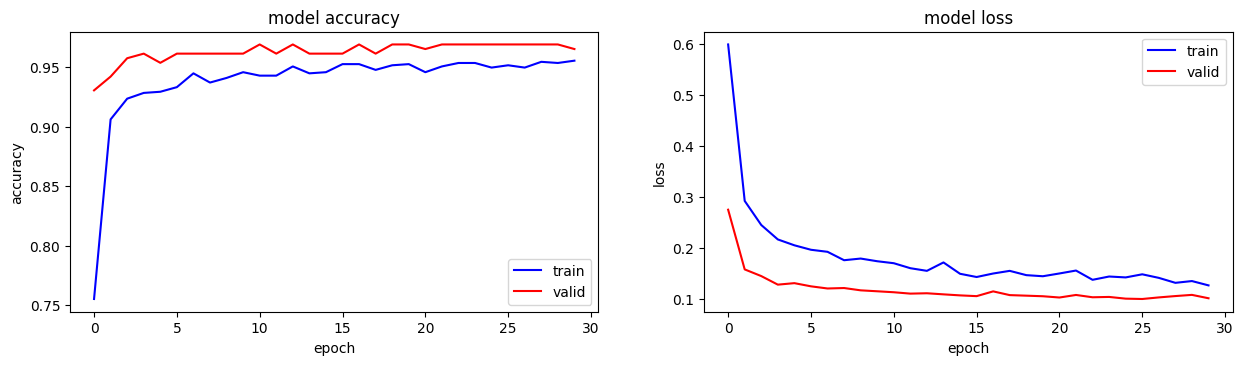

In [ ]:
plt.figure(1, figsize = (15,8))

plt.subplot(221)
plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.subplot(222)
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.show()